In [1]:
import torch
from torch import nn

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
!nvidia-smi

Tue Aug  5 15:11:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.03              Driver Version: 575.64.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce MX350           Off |   00000000:01:00.0 Off |                  N/A |
| N/A   65C    P8            N/A  / 5001W |       4MiB /   2048MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
#get the data
#here we use the food 101 dataset
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print("Data already downloaded.")
else:
    print("Downloading data...")
    image_path.mkdir(parents=True, exist_ok=True)

Data already downloaded.


In [5]:
#becoming one with the data(data preperation and data exploration)
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [7]:
train_dir = image_path / "train"
test_dir = image_path / "test"
test_dir,train_dir

(PosixPath('data/pizza_steak_sushi/test'),
 PosixPath('data/pizza_steak_sushi/train'))

Image class: sushi
sushi
Image size: (512, 382)
Image mode: RGB
382 512


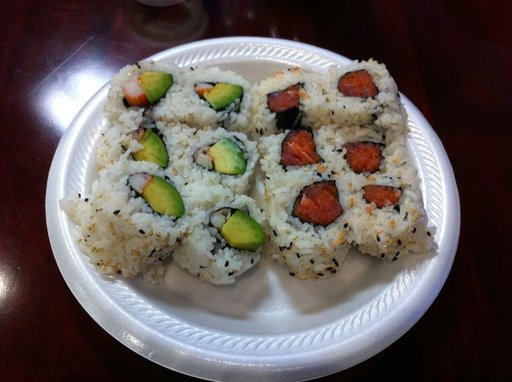

In [8]:
#visalize the image(get all image path and pick random image and get image class name all this using pillow)
from PIL import Image
import random
#set seed
# random.seed(42)
#get all img path

image_path_list  = list(image_path.glob("*/*/*.jpg"))
rand_img_path = random.choice(image_path_list)
rand_img_path

#get name of directory
image_class =  rand_img_path.parent.name
print(f"Image class: {image_class}")

#open image
img = Image.open(rand_img_path)
print(image_class)
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")
print(img.height, img.width)
img

(np.float64(-0.5), np.float64(511.5), np.float64(381.5), np.float64(-0.5))

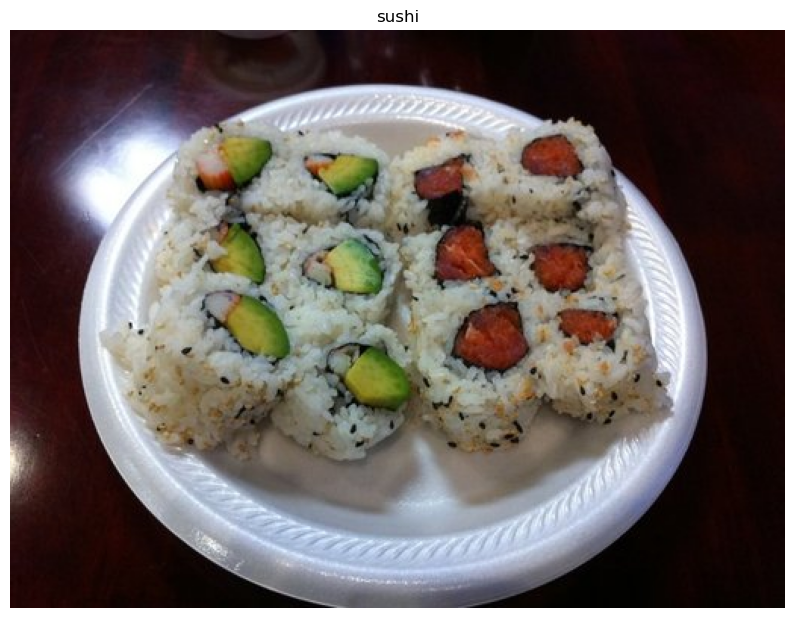

In [9]:
#try to visualize with matplotlib
import numpy as np
import matplotlib.pyplot as plt
img_array = np.asarray(img)
fig = plt.figure(figsize=(10, 10))
plt.imshow(img_array)
plt.title(image_class)
plt.axis(False)


In [10]:
img_array#now our image is in numerical format

array([[[34,  8, 11],
        [33,  7, 10],
        [33,  7, 10],
        ...,
        [34,  4,  2],
        [35,  4,  2],
        [36,  5,  3]],

       [[33,  7, 10],
        [33,  7, 10],
        [33,  7, 10],
        ...,
        [34,  4,  2],
        [35,  4,  2],
        [36,  5,  3]],

       [[33,  7, 10],
        [33,  7, 10],
        [33,  7, 10],
        ...,
        [34,  4,  2],
        [35,  4,  2],
        [36,  5,  3]],

       ...,

       [[34,  4,  4],
        [35,  5,  5],
        [35,  7,  6],
        ...,
        [10,  5,  2],
        [10,  5,  2],
        [10,  5,  2]],

       [[34,  4,  4],
        [35,  5,  5],
        [35,  7,  6],
        ...,
        [10,  5,  2],
        [10,  5,  2],
        [10,  5,  2]],

       [[34,  4,  4],
        [35,  5,  5],
        [35,  7,  6],
        ...,
        [10,  5,  2],
        [10,  5,  2],
        [ 9,  4,  1]]], shape=(382, 512, 3), dtype=uint8)

In [11]:
#we convert one pic into numbers but we need to convert all images into numbers
##transforming data(turn data into tensors)
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

In [12]:
#tranform data using torchvision.dataset
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),  # Resize images to 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally    
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

In [13]:
data_transform(img).shape,data_transform(img),data_transform(img).dtype#still we converting one image into tensor

(torch.Size([3, 64, 64]),
 tensor([[[0.1373, 0.1373, 0.1490,  ..., 0.1216, 0.1176, 0.1294],
          [0.1373, 0.1373, 0.1451,  ..., 0.1255, 0.1294, 0.1333],
          [0.1333, 0.1373, 0.1490,  ..., 0.1216, 0.1333, 0.1333],
          ...,
          [0.1255, 0.1255, 0.1255,  ..., 0.0471, 0.0510, 0.0510],
          [0.1294, 0.1294, 0.1255,  ..., 0.0431, 0.0510, 0.0471],
          [0.1294, 0.1294, 0.1333,  ..., 0.0353, 0.0471, 0.0392]],
 
         [[0.0353, 0.0353, 0.0353,  ..., 0.0196, 0.0196, 0.0157],
          [0.0353, 0.0314, 0.0314,  ..., 0.0196, 0.0196, 0.0157],
          [0.0314, 0.0314, 0.0314,  ..., 0.0157, 0.0157, 0.0196],
          ...,
          [0.0235, 0.0196, 0.0196,  ..., 0.0118, 0.0118, 0.0157],
          [0.0196, 0.0196, 0.0196,  ..., 0.0157, 0.0118, 0.0157],
          [0.0196, 0.0196, 0.0196,  ..., 0.0157, 0.0157, 0.0157]],
 
         [[0.0471, 0.0471, 0.0431,  ..., 0.0078, 0.0039, 0.0078],
          [0.0471, 0.0431, 0.0392,  ..., 0.0078, 0.0078, 0.0078],
          [0.0

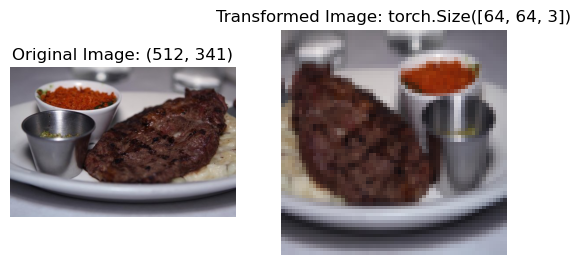

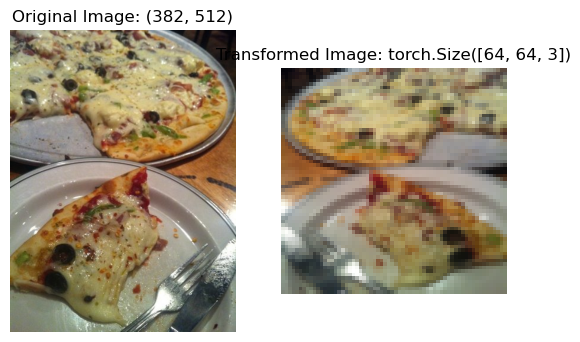

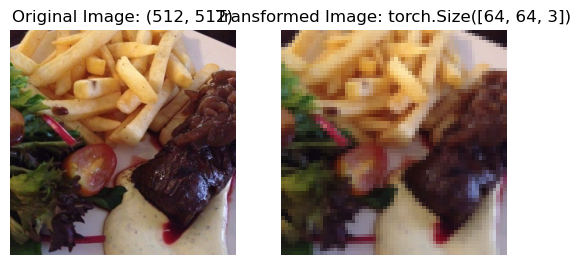

In [14]:
#visualize the transformed image
def plot_transformed_image(image_path,transforms,n=3,seed=None):
   if seed:
       random.seed(seed)
   rand_img_path = random.sample(image_path,k=n)
   for image_path in rand_img_path:
       with Image.open(image_path) as f:
         fig,ax = plt.subplots(nrows=1,ncols=2)
         ax[0].imshow(f)
         ax[0].set_title(f"Original Image: {f.size}")
         ax[0].axis(False)
         transformed_img = transforms(f).permute(1,2,0)
         ax[1].imshow(transformed_img)
         ax[1].set_title(f"Transformed Image: {transformed_img.shape}")
         ax[1].axis(False)          

plot_transformed_image(image_path_list,data_transform,seed=None,n=3)#now u see our image is pixelated becaz we may loss some data wile predicting i made this on intention. 

In [15]:
#use image folder to load image -- option 1
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform,target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
#get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [17]:
len(train_data), len(test_data)

(225, 75)

In [18]:
###visualize the loaded img in trai data
img,label = train_data[0][0],train_data[0][1]
print(img)
print(img.shape)
print(img.dtype)
print(label)
print(class_names[label])
print(type(img))

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

original shape: torch.Size([3, 64, 64]) -> permuted shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'Image label: pizza')

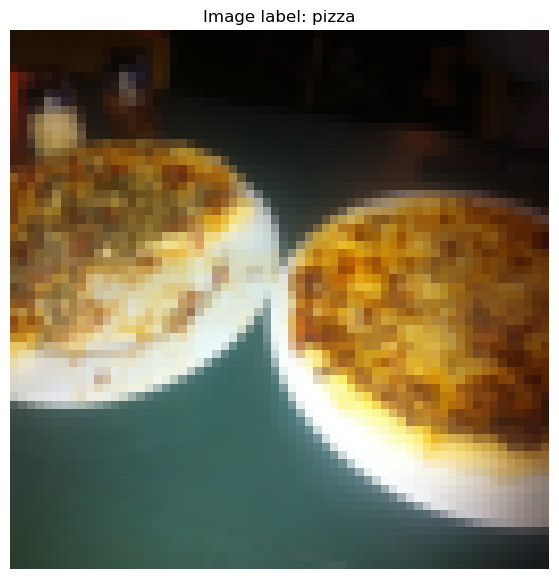

In [19]:
#rearrange the dimensions
img_permute = img.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C)

print(f"original shape: {img.shape} -> permuted shape: {img_permute.shape}")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(f"Image label: {class_names[label]}")

In [20]:
#datasets into data loader(data loader turns our datasets int dataloader)
train_dataloader = DataLoader(train_data, batch_size=1, shuffle=True,num_workers=1)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False,num_workers=1)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f350d032e40>,
 <torch.utils.data.dataloader.DataLoader at 0x7f350ced2990>)

In [21]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [22]:
img,label = next(iter(train_dataloader))
print(img.shape)
print(label.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1])


In [23]:
##loading dataset with custom dataset
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,List,Dict

In [24]:
#instance of torch.utils.datasets.Imagefolder()
train_data.class_to_idx,train_data.classes

({'pizza': 0, 'steak': 1, 'sushi': 2}, ['pizza', 'steak', 'sushi'])

In [25]:
#creating a helper function to get class names in directory
#setup path for target directory
target_directory = train_dir
print(target_directory)

classnames_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
classnames_found

data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [26]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
    classes = sorted(entry.name for entry in os.scandir(target_directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError("file nt found")
    
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes,class_to_idx
    

In [27]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [28]:
#create custom dataset to replicate `image folder`
from torch.utils.data import Dataset

class Imagefoldercustom(Dataset):
    def __init__(self,targ_dir:str,transform=None):
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform = transform
        self.classes,self.class_to_idx = find_classes(targ_dir)
        
    def load_image(self,index:int):
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index) -> Tuple[torch.Tensor,int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]  
        
        if self.transform:
            return self.transform(img),class_idx 
        else:
            return img,class_idx

In [29]:
#create a transform
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

train_transforms,test_transforms

(Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     RandomHorizontalFlip(p=0.5)
     ToTensor()
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     RandomHorizontalFlip(p=0.5)
     ToTensor()
 ))

In [30]:
train_data_custom = Imagefoldercustom(targ_dir=train_dir,transform=train_transforms)
test_data_Custom = Imagefoldercustom(targ_dir=test_dir,transform=test_transforms)

In [31]:
train_data_custom,test_data_Custom

(<__main__.Imagefoldercustom at 0x7f350d0c5940>,
 <__main__.Imagefoldercustom at 0x7f350ce6c050>)

In [32]:
# create a function to display rand images
def display_rand_images(dataset:torch.utils.data.Dataset,
                        classes:List[str]=None,
                        n:int =10,
                        seed:int = None,
                        display_shape:bool = True
                        ):
    if n > 10:
        n = 10
        display_shape = False
        print("n shouldnt be larger than 10")
    
    if seed:
        random.seed(seed)
    
    random_samples_idx = random.sample(range(len(dataset)),k =n)
    
    plt.figure(figsize=(16,10))
    
    for i,targ_sample in enumerate(random_samples_idx):
        targ_img,targ_label = dataset[targ_sample][0],dataset[targ_sample][1]
        
        targ_img_adjust = targ_img.permute(1,2,0)
        plt.subplot(1,n,i+1)
        plt.imshow(targ_img_adjust)
        plt.axis("off")
        if classes:
            title = f"classes: {classes[targ_label]}"
            if display_shape:
                title=title + f" shape: {targ_img_adjust.shape}"
        plt.title(title)

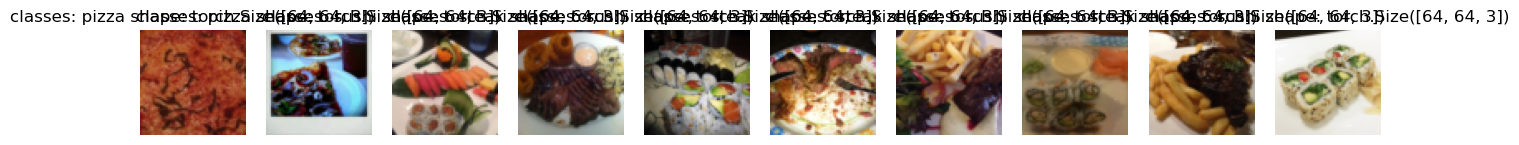

In [33]:
display_rand_images(train_data,n=10,classes=class_names,seed =None)

n shouldnt be larger than 10


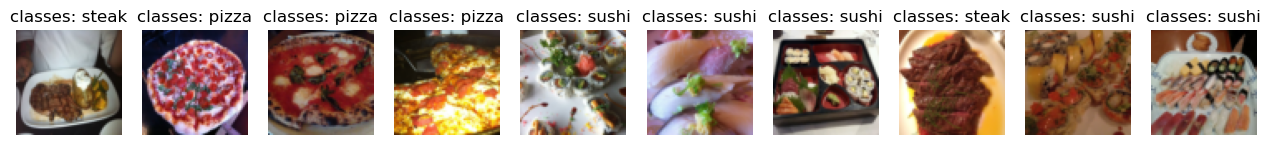

In [34]:
display_rand_images(train_data_custom,n=20,classes=class_names,seed=None)

In [37]:
# turn our custom dataset into dataloaders

train_dataloader_custom = DataLoader(train_data_custom, batch_size=32, shuffle=True, num_workers=os.cpu_count())
test_dataloader_custom = DataLoader(test_data_Custom, batch_size=32, shuffle=False, num_workers=os.cpu_count())

train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x7f34fc4c3c50>,
 <torch.utils.data.dataloader.DataLoader at 0x7f34fc4c3b10>)

In [40]:
img_custom,label_custom = next(iter(train_dataloader_custom))
img_custom.shape,label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [41]:
#augumentation
#trivial augumentation
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [42]:
#get all img path
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list

[PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1302563.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi

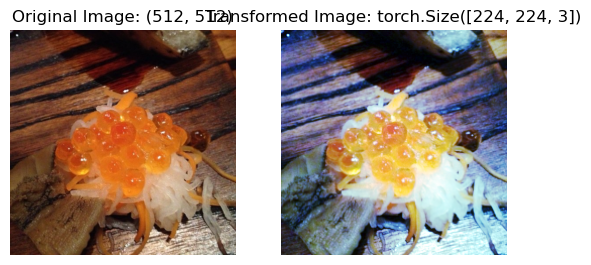

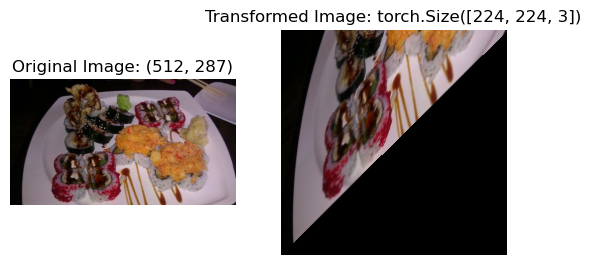

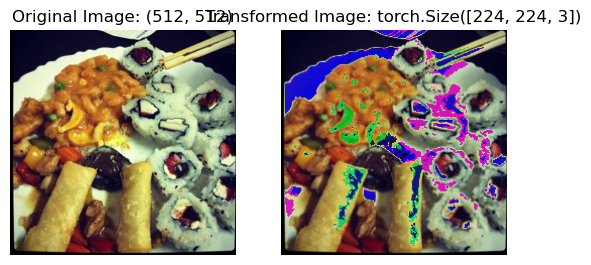

In [44]:
#random transform
plot_transformed_image(image_path=image_path_list,transforms=train_transform,n=3,seed=None)

In [45]:
#building the baseline model (load and transform)
#create transform and load data
simple_transform  = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [48]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,transform=simple_transform)

#dataset into loader

import os
from torch.utils.data import DataLoader  # Fixed the class name

train_dataloader_simple = DataLoader(dataset=train_data_simple,batch_size=32,shuffle=True,num_workers=os.cpu_count())

test_dataloader_simple = DataLoader(dataset=test_data_simple,batch_size=32,shuffle=False,num_workers=os.cpu_count())



In [95]:
#model(tinyvgg arch)
class tinyvgg(nn.Module):
    def __init__(self,input:int,hidden:int,output:int)->None:
        super().__init__()
        self.conv_block1 = nn.Sequential(
             nn.Conv2d(input,hidden,kernel_size=3,stride=1,padding=0),
             nn.ReLU(),
             nn.Conv2d(hidden,hidden,kernel_size=3,stride=1,padding=0),
             nn.ReLU(),
             nn.MaxPool2d(kernel_size=2,stride=2)
             )
        self.conv_block2 = nn.Sequential(
             nn.Conv2d(hidden,hidden,kernel_size=3,stride=1,padding=0),
             nn.ReLU(),
             nn.Conv2d(hidden,hidden,kernel_size=3,stride=1,padding=0),
             nn.ReLU(),
             nn.MaxPool2d(kernel_size=2,stride=2)
             )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden*53*53,out_features=output)   
        )
    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        print(x.shape)  # 👈 See the shape before flattening
        x = x.view(x.size(0), -1)  # flatten
        x = self.classifier(x)
        return x

In [96]:
torch.manual_seed(42)
model1 = tinyvgg(input=3,hidden=10,output=len(class_names)).to(device)
model1

tinyvgg(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=3, bias=True)
  )
)

In [97]:
image_batch,label_batch = next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [98]:
#try forward pass on single image
model1(image_batch.to(device))

torch.Size([32, 10, 53, 53])


tensor([[ 0.0351,  0.0035, -0.0037],
        [ 0.0401, -0.0002, -0.0068],
        [ 0.0352,  0.0008, -0.0047],
        [ 0.0360, -0.0024, -0.0052],
        [ 0.0345,  0.0059, -0.0034],
        [ 0.0421,  0.0064, -0.0071],
        [ 0.0379,  0.0057, -0.0015],
        [ 0.0321,  0.0023, -0.0027],
        [ 0.0340,  0.0024, -0.0014],
        [ 0.0383,  0.0038, -0.0048],
        [ 0.0356,  0.0027, -0.0047],
        [ 0.0371,  0.0039, -0.0055],
        [ 0.0374,  0.0071, -0.0031],
        [ 0.0340,  0.0070, -0.0039],
        [ 0.0379,  0.0030, -0.0059],
        [ 0.0379,  0.0045, -0.0057],
        [ 0.0373,  0.0062, -0.0065],
        [ 0.0374,  0.0024, -0.0042],
        [ 0.0346,  0.0045, -0.0023],
        [ 0.0369,  0.0051, -0.0073],
        [ 0.0330,  0.0049, -0.0021],
        [ 0.0301,  0.0041, -0.0038],
        [ 0.0400,  0.0064, -0.0047],
        [ 0.0398,  0.0081, -0.0045],
        [ 0.0323,  0.0031, -0.0042],
        [ 0.0378,  0.0067, -0.0056],
        [ 0.0376,  0.0072, -0.0042],
 

In [104]:
#using torchinfo to get the summary of our model
import torchinfo
from torchinfo import summary
summary(model1,input_size=[1,3,224,224])

torch.Size([1, 10, 53, 53])


Layer (type:depth-idx)                   Output Shape              Param #
tinyvgg                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 110, 110]         --
│    └─Conv2d: 2-1                       [1, 10, 222, 222]         280
│    └─ReLU: 2-2                         [1, 10, 222, 222]         --
│    └─Conv2d: 2-3                       [1, 10, 220, 220]         910
│    └─ReLU: 2-4                         [1, 10, 220, 220]         --
│    └─MaxPool2d: 2-5                    [1, 10, 110, 110]         --
├─Sequential: 1-2                        [1, 10, 53, 53]           --
│    └─Conv2d: 2-6                       [1, 10, 108, 108]         910
│    └─ReLU: 2-7                         [1, 10, 108, 108]         --
│    └─Conv2d: 2-8                       [1, 10, 106, 106]         910
│    └─ReLU: 2-9                         [1, 10, 106, 106]         --
│    └─MaxPool2d: 2-10                   [1, 10, 53, 53]           --
├─Sequentia